In [1]:
import numpy as np
import pandas as pd
import quandl
import ta
import finta
import os
import pathlib
import shutil
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from PIL import Image
import time
import torch
import copy

In [3]:
import zipfile
with zipfile.ZipFile("predictions/inception_2_0.zip", 'r') as zip_ref:
    zip_ref.extractall("predictions/inception_2_0")

In [4]:
equity_list = ['MMM','AXP','AAPL','BA','CAT','CVX','CSCO','KO','DIS','XOM','GE','GS','HD','IBM','INTC','JNJ','JPM','MCD','MRK','MSFT','NKE','PFE','PG','TRV','UTX','UNH','VZ','WMT']
# equity_list = ['MMM','AXP','AAPL','BA']  # Short version for debugging
# equity_list = ['AXP','AAPL','BA','CVX','DIS','GS','HD'] # for comparison
# feature_list = ['RSI','Williams','WMA','EMA','SMA','HMA','3EMA','CCI','CMO','MACD','PPO','ROC','CMFI','DMI','PSI']

In [5]:
def get_eq_dict(eq_list):
    equities_dfs = {}
    for equity in eq_list:
        print(equity)
        output_df = pd.DataFrame()
        temp_df = quandl.get("EOD/"+equity, authtoken="6y4QKxqZxio2nBP3VSwZ")
        date_range_df = temp_df.loc['2001-11-01':'2018-01-01']
        data_range_df_finta = date_range_df.copy() 
        data_range_df_finta.columns = data_range_df_finta.columns.str.lower()
        output_df['RSI'] = ta.momentum.rsi(date_range_df['Close'])
        output_df['Williams'] = ta.momentum.williams_r(date_range_df['High'],date_range_df['Low'],date_range_df['Close'])
        output_df['WMA'] = ta.trend.wma_indicator(date_range_df['Close'])
        output_df['EMA'] = ta.trend.ema_indicator(date_range_df['Close'])
        output_df['SMA'] = ta.trend.sma_indicator(date_range_df['Close'])
        output_df['HMA'] =  finta.TA.HMA(data_range_df_finta[['open','high','low','close']])
        output_df['3EMA'] = ta.trend.trix(date_range_df['Close'])  #Tripple EMA
        output_df['CCI'] = ta.trend.cci(date_range_df['High'],date_range_df['Low'],date_range_df['Close'])  
        output_df['CMO'] =  finta.TA.CMO(data_range_df_finta[['open','high','low','close']])
        output_df['MACD'] = ta.trend.macd(date_range_df['Close'])  
        output_df['PPO'] = ta.momentum.PercentagePriceOscillator(date_range_df['Close']).ppo()
        output_df['ROC'] = ta.momentum.ROCIndicator(date_range_df['Close']).roc()
        output_df['CMFI'] = ta.volume.ChaikinMoneyFlowIndicator(date_range_df['High'],date_range_df['Low'],date_range_df['Close'], date_range_df['Volume']).chaikin_money_flow()
        output_df['DMI'] =  ta.trend.ADXIndicator(date_range_df['High'],date_range_df['Low'],date_range_df['Close']).adx() # ADX is average direction movement index
        output_df['PSI'] = ta.trend.PSARIndicator(date_range_df['High'],date_range_df['Low'],date_range_df['Close']).psar()
        output_df['Close'] = date_range_df['Close']
        output_df['Label'] = 'hold'
        output_df = output_df.reset_index()
        equities_dfs[equity] = output_df
    return equities_dfs

In [6]:
equities_dfs = get_eq_dict(equity_list)
for eq in equity_list:
    equities_dfs[eq] = equities_dfs[eq].set_index('Date')   

MMM


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


AXP


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


AAPL


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


BA


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


CAT


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


CVX


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


CSCO


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


KO


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


DIS


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


XOM


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


GE


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


GS


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


HD


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


IBM


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


INTC


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


JNJ


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


JPM


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


MCD


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


MRK


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


MSFT


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


NKE


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


PFE


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


PG


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


TRV


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


UTX


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


UNH


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


VZ


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


WMT


/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [9]:
AAPL = equities_dfs['AAPL']
len(AAPL.loc['2008-01-01':'2009-01-01'])

253

In [10]:
file_path = "predictions/baseline/" + 'AAPL' + "_baseline.csv"
prediction = pd.read_csv(file_path)
prediction

,Unnamed: 0,2007-01-01 00:00:00,2008-01-01 00:00:00,2009-01-01 00:00:00,2010-01-01 00:00:00,2011-01-01 00:00:00,2012-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00
0,0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,2,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
4,4,0.0,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
248,248,1.0,1,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0
249,249,1.0,2,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0
250,250,2.0,1,2.0,1.0,2.0,NaN,2.0,2.0,1.0,1.0
251,251,NaN,1,1.0,1.0,2.0,NaN,2.0,1.0,1.0,1.0


In [18]:
def calculate_AR(equity_name):
    
    file_path = "predictions/baseline_3_0/" + equity_name + "_baseline.csv"
    prediction = pd.read_csv(file_path)
    
    equity = equities_dfs[equity_name]

    # 0 = buy, 1 = hold, 2 = sell
    year = ['2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01']
    money = 10000
    no_of_stock = 0
    state = 1 # initial state of holding

    for i in range(10): # in ten years
        for j in range(len(equity.loc[year[i]:year[i+1]])): # in a year
            action = prediction[year[i]+" 00:00:00"].iloc[j]
            price = equity['Close'].loc[year[i]:year[i+1]].iloc[j]
            if pd.isnull(action):
                break
            if action == 0 and state != 0:
                no_of_stock = money / price
                money = 0
                state = 0 # update state to 'bought'
            if action == 2 and state == 0:
                money = price * no_of_stock
                no_of_stock = 0
                state = 2 # update state to 'sold'

    close_price = equity['Close'].loc['2007-01-01':'2017-01-01'].iloc[-1]
    start_price = equity['Close'].loc['2007-01-01':'2017-01-01'].iloc[0]
    if no_of_stock != 0:
        money = close_price * no_of_stock # sell all stocks in the end

    AR = np.power(money/10000, 1/10) - 1
    BaH = np.power(close_price/start_price, 1/10) - 1
    
#     print(equity_name)
#     print('Buy&Hold:', BaH)
#     print('Annual return:', AR)
#     print(equity_name + '\t %.2f\t %.2f' % (100*AR, 100*BaH))

    return AR, BaH

In [19]:
print("Stock\t AR\t Buy & Hold")

AR_all = []
BaH_all = []
for equity in equity_list:
    AR, BaH = calculate_AR(equity)
    AR_all.append(AR)
    BaH_all.append(BaH)
    print(equity + '\t %.2f\t %.2f' % (100*AR, 100*BaH))
    
print('Average\t %.2f\t %.2f' % (100*np.average(AR_all), 100*np.average(BaH_all)))
print('St.Dev.\t %.2f\t %.2f' % (100*np.std(AR_all), 100*np.std(BaH_all)))

Stock	 AR	 Buy & Hold
MMM	 -0.01	 8.60
AXP	 0.95	 2.07
AAPL	 18.79	 3.29
BA	 8.24	 5.73
CAT	 3.50	 4.25
CVX	 10.24	 5.19
CSCO	 6.93	 0.86
KO	 0.52	 -1.57
DIS	 12.25	 11.79
XOM	 5.03	 1.99
GE	 8.96	 -1.82
GS	 11.13	 1.78
HD	 10.66	 12.56
IBM	 1.16	 5.49
INTC	 -1.40	 5.95
JNJ	 4.68	 5.67
JPM	 7.02	 6.03
MCD	 2.30	 10.74
MRK	 -4.73	 2.95
MSFT	 5.96	 7.60
NKE	 8.85	 -6.32
PFE	 -3.35	 2.14
PG	 1.92	 2.68
TRV	 7.65	 8.62
UTX	 5.79	 5.73
UNH	 5.79	 11.78
VZ	 -0.61	 3.51
WMT	 0.25	 3.81
Average	 4.95	 4.68
St.Dev.	 5.18	 4.24


In [14]:
import datetime

def plot_profit(equity_name):
    
    file_path = "predictions/baseline_test/" + equity_name + "_baseline.csv"
    prediction = pd.read_csv(file_path)
    
    equity = equities_dfs[equity_name]

    # 0 = buy, 1 = hold, 2 = sell
    year = ['2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01']
    money = 10000
    no_of_stock = 0
    state = 1 # initial state of holding
    
    dates = []
    prediction_profit = []
    counter = 0
    BaH_profit = []
    start_price = equity['Close'].loc['2007-01-01':'2017-01-01'].iloc[0]

    for i in range(10): # in ten years
        for j in range(len(equity.loc[year[i]:year[i+1]])): # in a year
            action = prediction[year[i]+" 00:00:00"].iloc[j]
            price = equity['Close'].loc[year[i]:year[i+1]].iloc[j]
            if pd.isnull(action):
                break
            if action == 0 and state != 0:
                no_of_stock = money / price
                money = 0
                state = 0 # update state to 'bought'
            if action == 2 and state == 0:
                money = price * no_of_stock
                no_of_stock = 0
                state = 2 # update state to 'sold'
                # For profit plot
                dates.append(equity.loc['2007-01-01':'2017-01-01'].index[counter])
                prediction_profit.append(money)
                BaH_profit.append(10000*price/start_price)
            counter += 1
            
    return dates, prediction_profit, BaH_profit

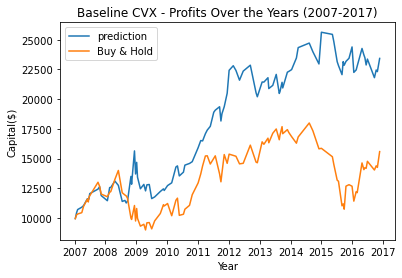

In [16]:
equity_name = 'CVX'
dates, prediction_profit, BaH_profit = plot_profit(equity_name)

plt.plot(dates, prediction_profit, label='prediction')
plt.plot(dates, BaH_profit, label='Buy & Hold')

plt.title('Baseline ' + equity_name + ' - Profits Over the Years (2007-2017)')
plt.xlabel('Year')
plt.ylabel('Capital($)')
plt.legend()
plt.show()

# Additional Features

In [7]:
def calculate_AR(equity_name):
    
    file_path = "predictions/additional_2_0/" + equity_name + "_additional.csv"
    prediction = pd.read_csv(file_path)
    
    equity = equities_dfs[equity_name]

    # 0 = buy, 1 = hold, 2 = sell
    year = ['2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01']
    money = 10000
    no_of_stock = 0
    state = 1 # initial state of holding

    for i in range(10): # in ten years
        for j in range(len(equity.loc[year[i]:year[i+1]])): # in a year
            action = prediction[year[i]+" 00:00:00"].iloc[j]
            price = equity['Close'].loc[year[i]:year[i+1]].iloc[j]
            if pd.isnull(action):
                break
            if action == 0 and state != 0:
                no_of_stock = money / price
                money = 0
                state = 0 # update state to 'bought'
            if action == 2 and state == 0:
                money = price * no_of_stock
                no_of_stock = 0
                state = 2 # update state to 'sold'

    close_price = equity['Close'].loc['2007-01-01':'2017-01-01'].iloc[-1]
    start_price = equity['Close'].loc['2007-01-01':'2017-01-01'].iloc[0]
    if no_of_stock != 0:
        money = close_price * no_of_stock # sell all stocks in the end

    AR = np.power(money/10000, 1/10) - 1
    BaH = np.power(close_price/start_price, 1/10) - 1

    return AR, BaH

In [8]:
import datetime

def plot_profit(equity_name):
    
    file_path = "predictions/additional_2_0/" + equity_name + "_additional.csv"
    prediction = pd.read_csv(file_path)
    
    equity = equities_dfs[equity_name]

    # 0 = buy, 1 = hold, 2 = sell
    year = ['2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01']
    money = 10000
    no_of_stock = 0
    state = 1 # initial state of holding
    
    dates = []
    prediction_profit = []
    counter = 0
    BaH_profit = []
    start_price = equity['Close'].loc['2007-01-01':'2017-01-01'].iloc[0]

    for i in range(10): # in ten years
        for j in range(len(equity.loc[year[i]:year[i+1]])): # in a year
            action = prediction[year[i]+" 00:00:00"].iloc[j]
            price = equity['Close'].loc[year[i]:year[i+1]].iloc[j]
            if pd.isnull(action):
                break
            if action == 0 and state != 0:
                no_of_stock = money / price
                money = 0
                state = 0 # update state to 'bought'
            if action == 2 and state == 0:
                money = price * no_of_stock
                no_of_stock = 0
                state = 2 # update state to 'sold'
                # For profit plot
                dates.append(equity.loc['2007-01-01':'2017-01-01'].index[counter])
                prediction_profit.append(money)
                BaH_profit.append(10000*price/start_price)
            counter += 1
            
    return dates, prediction_profit, BaH_profit

In [9]:
print("Stock\t AR\t Buy & Hold")

AR_all = []
BaH_all = []
for equity in equity_list:
    AR, BaH = calculate_AR(equity)
    AR_all.append(AR)
    BaH_all.append(BaH)
    print(equity + '\t %.2f\t %.2f' % (100*AR, 100*BaH))
    
print('Average\t %.2f\t %.2f' % (100*np.average(AR_all), 100*np.average(BaH_all)))
print('St.Dev.\t %.2f\t %.2f' % (100*np.std(AR_all), 100*np.std(BaH_all)))

Stock	 AR	 Buy & Hold
MMM	 -1.32	 8.60
AXP	 5.47	 2.07
AAPL	 23.32	 3.29
BA	 9.72	 5.73
CAT	 -3.47	 4.25
CVX	 9.36	 5.19
CSCO	 3.18	 0.86
KO	 0.47	 -1.57
DIS	 14.76	 11.79
XOM	 3.37	 1.99
GE	 9.12	 -1.82
GS	 3.61	 1.78
HD	 10.46	 12.56
IBM	 -2.51	 5.49
INTC	 -5.20	 5.95
JNJ	 3.56	 5.67
JPM	 14.34	 6.03
MCD	 4.67	 10.74
MRK	 -2.19	 2.95
MSFT	 7.45	 7.60
NKE	 4.12	 -6.32
PFE	 -0.14	 2.14
PG	 5.61	 2.68
TRV	 5.66	 8.62
UTX	 2.77	 5.73
UNH	 3.62	 11.78
VZ	 -1.10	 3.51
WMT	 1.08	 3.81
Average	 4.64	 4.68
St.Dev.	 6.13	 4.24


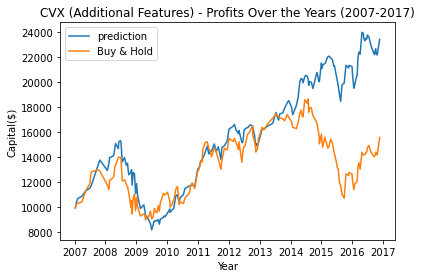

In [10]:
equity_name = 'CVX'
dates, prediction_profit, BaH_profit = plot_profit(equity_name)

plt.plot(dates, prediction_profit, label='prediction')
plt.plot(dates, BaH_profit, label='Buy & Hold')

plt.title(equity_name + ' (Additional Features)' + ' - Profits Over the Years (2007-2017)')
plt.xlabel('Year')
plt.ylabel('Capital($)')
plt.legend()
plt.show()

# Inception Blocks

In [11]:
def calculate_AR(equity_name):
    
    file_path = "predictions/inception_2_0/" + equity_name + "_inception.csv"
    prediction = pd.read_csv(file_path)
    
    equity = equities_dfs[equity_name]

    # 0 = buy, 1 = hold, 2 = sell
    year = ['2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01']
    money = 10000
    no_of_stock = 0
    state = 1 # initial state of holding

    for i in range(10): # in ten years
        for j in range(len(equity.loc[year[i]:year[i+1]])): # in a year
            action = prediction[year[i]+" 00:00:00"].iloc[j]
            price = equity['Close'].loc[year[i]:year[i+1]].iloc[j]
            if pd.isnull(action):
                break
            if action == 0 and state != 0:
                no_of_stock = money / price
                money = 0
                state = 0 # update state to 'bought'
            if action == 2 and state == 0:
                money = price * no_of_stock
                no_of_stock = 0
                state = 2 # update state to 'sold'

    close_price = equity['Close'].loc['2007-01-01':'2017-01-01'].iloc[-1]
    start_price = equity['Close'].loc['2007-01-01':'2017-01-01'].iloc[0]
    if no_of_stock != 0:
        money = close_price * no_of_stock # sell all stocks in the end

    AR = np.power(money/10000, 1/10) - 1
    BaH = np.power(close_price/start_price, 1/10) - 1

    return AR, BaH

In [12]:
import datetime

def plot_profit(equity_name):
    
    file_path = "predictions/inception_2_0/" + equity_name + "_inception.csv"
    prediction = pd.read_csv(file_path)
    
    equity = equities_dfs[equity_name]

    # 0 = buy, 1 = hold, 2 = sell
    year = ['2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01']
    money = 10000
    no_of_stock = 0
    state = 1 # initial state of holding
    
    dates = []
    prediction_profit = []
    counter = 0
    BaH_profit = []
    start_price = equity['Close'].loc['2007-01-01':'2017-01-01'].iloc[0]

    for i in range(10): # in ten years
        for j in range(len(equity.loc[year[i]:year[i+1]])): # in a year
            action = prediction[year[i]+" 00:00:00"].iloc[j]
            price = equity['Close'].loc[year[i]:year[i+1]].iloc[j]
            if pd.isnull(action):
                break
            if action == 0 and state != 0:
                no_of_stock = money / price
                money = 0
                state = 0 # update state to 'bought'
            if action == 2 and state == 0:
                money = price * no_of_stock
                no_of_stock = 0
                state = 2 # update state to 'sold'
                # For profit plot
                dates.append(equity.loc['2007-01-01':'2017-01-01'].index[counter])
                prediction_profit.append(money)
                BaH_profit.append(10000*price/start_price)
            counter += 1
            
    return dates, prediction_profit, BaH_profit

In [13]:
print("Stock\t AR\t Buy & Hold")

AR_all = []
BaH_all = []
for equity in equity_list:
    AR, BaH = calculate_AR(equity)
    AR_all.append(AR)
    BaH_all.append(BaH)
    print(equity + '\t %.2f\t %.2f' % (100*AR, 100*BaH))
    
print('Average\t %.2f\t %.2f' % (100*np.average(AR_all), 100*np.average(BaH_all)))
print('St.Dev.\t %.2f\t %.2f' % (100*np.std(AR_all), 100*np.std(BaH_all)))

Stock	 AR	 Buy & Hold
MMM	 8.57	 8.60
AXP	 5.86	 2.07
AAPL	 -12.98	 3.29
BA	 4.38	 5.73
CAT	 1.96	 4.25
CVX	 -3.25	 5.19
CSCO	 4.46	 0.86
KO	 -3.50	 -1.57
DIS	 7.51	 11.79
XOM	 -1.41	 1.99
GE	 -3.18	 -1.82
GS	 1.90	 1.78
HD	 4.85	 12.56
IBM	 3.05	 5.49
INTC	 4.52	 5.95
JNJ	 -0.63	 5.67
JPM	 12.33	 6.03
MCD	 7.04	 10.74
MRK	 5.64	 2.95
MSFT	 -1.66	 7.60
NKE	 4.53	 -6.32
PFE	 5.39	 2.14
PG	 2.79	 2.68
TRV	 -2.24	 8.62
UTX	 9.99	 5.73
UNH	 19.61	 11.78
VZ	 4.29	 3.51
WMT	 3.51	 3.81
Average	 3.33	 4.68
St.Dev.	 5.89	 4.24


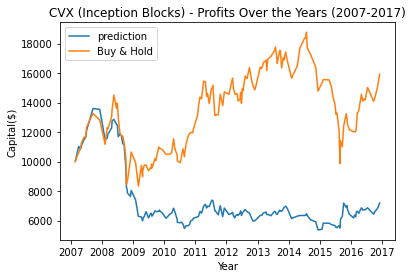

In [14]:
equity_name = 'CVX'
dates, prediction_profit, BaH_profit = plot_profit(equity_name)

plt.plot(dates, prediction_profit, label='prediction')
plt.plot(dates, BaH_profit, label='Buy & Hold')

plt.title(equity_name + ' (Inception Blocks)' + ' - Profits Over the Years (2007-2017)')
plt.xlabel('Year')
plt.ylabel('Capital($)')
plt.legend()
plt.show()